# 1. Support Vector Machines
## 1.1. Support Vector Machines
In this section, we will try different regularization power using linear kernel SVM.

In [1]:
using MAT
using Gadfly
using ScikitLearn
using ScikitLearn.Utils: meshgrid
using DataFrames
using 
@sk_import svm: SVC

PyObject <class 'sklearn.svm.classes.SVC'>

In [2]:
data_1 = matread("./data/ex6data1.mat")
data_2 = matread("./data/ex6data2.mat")
data_3 = matread("./data/ex6data3.mat")

Dict{String,Any} with 4 entries:
  "X"    => [-0.158986 0.423977; -0.347926 0.47076; … ; -0.294124 -0.134795; -0…
  "yval" => [0.0; 1.0; … ; 0.0; 0.0]
  "Xval" => [-0.353062 -0.673902; -0.227126 0.44732; … ; 0.248682 -0.497502; -0…
  "y"    => [1.0; 1.0; … ; 0.0; 0.0]

In [3]:
data1_df = DataFrame(x1=data_1["X"][:,1],
                     x2=data_1["X"][:,2],
                     label=data_1["y"][:,1])
# data1_df[:label] = map(x -> convert(Int64, x), data1_df[:label])
head(data1_df)

,x1,x2,label
1,1.9643,4.5957,1.0
2,2.2753,3.8589,1.0
3,2.9781,4.5651,1.0
4,2.932,3.5519,1.0
5,3.5772,2.856,1.0
6,4.015,3.1937,1.0


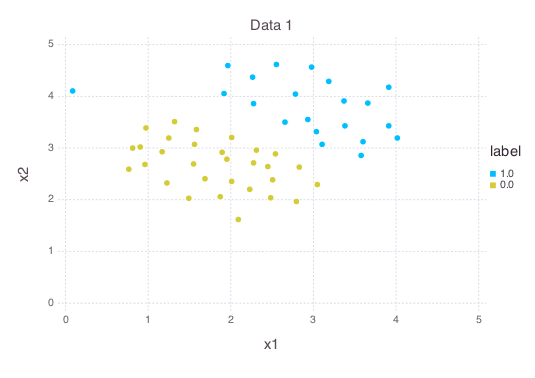

In [4]:
plot(data1_df, x=:x1, y=:x2, Geom.point, color=:label,
     Scale.color_discrete(), Guide.title("Data 1"))

Then we can try to run SVM, and see what the decision boundry will be.

In [5]:
model = SVC(kernel="linear", C=1.0)
model = ScikitLearn.fit!(model, data_1["X"], data_1["y"][:,1])

PyObject SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

I have tried `LIBSVM.jl`, `KSVM.jl`, `ScikitLearn.jl`. It seems only `ScikitLearn.jl` gave an interace to plot the decision boundary.

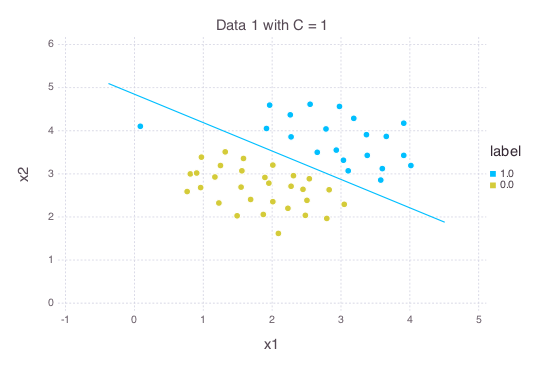

In [6]:
h=0.02
x_min, x_max = minimum(data_1["X"][:, 1]) - .5, maximum(data_1["X"][:, 1]) + .5
y_min, y_max = minimum(data_1["X"][:, 2]) - .5, maximum(data_1["X"][:, 2]) + .5
xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)

z = decision_function(model, hcat(xx[:], yy[:]))
z = reshape(z, size(xx)...)

plot(layer(data1_df, x=:x1, y=:x2, Geom.point, color=:label),
     layer(z=z', x=x_min:h:x_max, y=y_min:h:y_max, Geom.contour(levels = [0.0])),
     Scale.color_discrete(), Guide.title("Data 1 with C = 1"))

Then we can try `c = 100`.

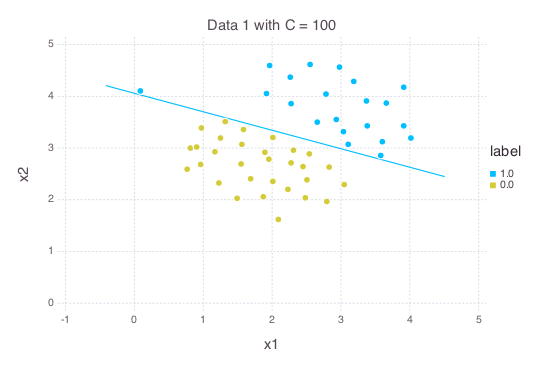

In [7]:
model = SVC(kernel="linear", C=100.0)
model = ScikitLearn.fit!(model, data_1["X"], data_1["y"][:,1])

x_min, x_max = minimum(data_1["X"][:, 1]) - .5, maximum(data_1["X"][:, 1]) + .5
y_min, y_max = minimum(data_1["X"][:, 2]) - .5, maximum(data_1["X"][:, 2]) + .5
xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)

z = decision_function(model, hcat(xx[:], yy[:]))
z = reshape(z, size(xx)...)

plot(layer(data1_df, x=:x1, y=:x2, Geom.point, color=:label),
     layer(z=z', x=x_min:h:x_max, y=y_min:h:y_max, Geom.contour(levels = [0.0])),
     Scale.color_discrete(), Guide.title("Data 1 with C = 100"))

The plot patterns are expected. Higher C means less regularization power, then the mondel tries to seperate as many points as possible. Smaller C then can avoid overfitting problem.

## 1.2. SVM with Gaussian Kernels
### 1.2.1. Gaussian Kernel
We will implement a gaussian kernel.

$$K_{\text{gaussian}}(x^{(i)}, x^{(j)}) = \exp\left(-\frac{\sum_{k=1}^n(x_k^{(i)} - x_k^{(j)})^2}{2\sigma^2}\right)$$

In [8]:
function gaussian_kernel{T1, T2<:Real}(x1::Array{T1}, x2::Array{T2}, sigma)
    result = []
    for i in 1:size(x1, 1)
        append!(result, exp(-1 * (sum((x1 .- x2) .^ 2)) / (2 * (sigma ^ 2))))
    end
    return(result)
end

gaussian_kernel (generic function with 1 method)

In [9]:
x1 = [1 2 1]
x2 = [0 4 -1]
sigma = 2
gaussian_kernel(x1, x2, sigma)

1-element Array{Any,1}:
 0.324652

### 1.2.2. Example Dataset 2
Then we can try gaussian kernel with SVM to solve non-linear-seperatable problem.

In [10]:
data2_df = DataFrame(x1=data_2["X"][:,1],
                     x2=data_2["X"][:,2],
                     label=data_2["y"][:,1])
head(data1_df)

,x1,x2,label
1,1.9643,4.5957,1.0
2,2.2753,3.8589,1.0
3,2.9781,4.5651,1.0
4,2.932,3.5519,1.0
5,3.5772,2.856,1.0
6,4.015,3.1937,1.0


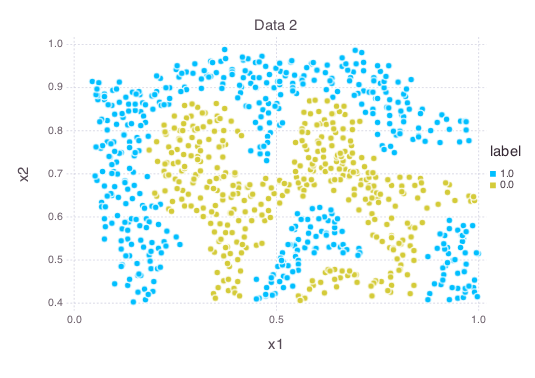

In [11]:
plot(data2_df, x=:x1, y=:x2, color=:label,
     Scale.color_discrete(), Guide.title("Data 2"))

There are some issues using our customized kernel, so we can just directly use "rbf" kernel. The $\sigma$ term becomes $\gamma$ as below:

$$K_{\text{gaussian}}(x^{(i)}, x^{(j)}) = \exp\left(-\gamma\sum_{k=1}^n(x_k^{(i)} - x_k^{(j)})^2\right)$$

Then we have

$$\gamma = \frac{1}{2\sigma^2}$$

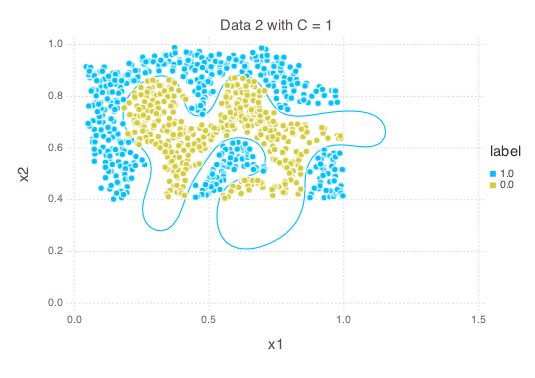

In [12]:
sigma = 0.1
model = SVC(kernel="rbf", C=1.0, gamma=1/(2 * (sigma^2)))
model = ScikitLearn.fit!(model, data_2["X"], data_2["y"][:,1])

x_min, x_max = minimum(data_2["X"][:, 1]) - .5, maximum(data_2["X"][:, 1]) + .5
y_min, y_max = minimum(data_2["X"][:, 2]) - .5, maximum(data_2["X"][:, 2]) + .5
xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)

z = decision_function(model, hcat(xx[:], yy[:]))
z = reshape(z, size(xx)...)

plot(layer(data2_df, x=:x1, y=:x2, Geom.point, color=:label),
     layer(z=z', x=x_min:h:x_max, y=y_min:h:y_max, Geom.contour(levels = [0.0])),
     Scale.color_discrete(), Guide.title("Data 2 with C = 1"))

The decision boundary looks fair.

### 1.2.2. Example Dataset 2
In this section, we will use Crass Validation Grid Search to find the best parameters for dataset 3.

In [13]:
data3_df = DataFrame(x1=data_3["X"][:,1],
                     x2=data_3["X"][:,2],
                     label=data_3["y"][:,1])
# data1_df[:label] = map(x -> convert(Int64, x), data1_df[:label])
head(data1_df)

,x1,x2,label
1,1.9643,4.5957,1.0
2,2.2753,3.8589,1.0
3,2.9781,4.5651,1.0
4,2.932,3.5519,1.0
5,3.5772,2.856,1.0
6,4.015,3.1937,1.0


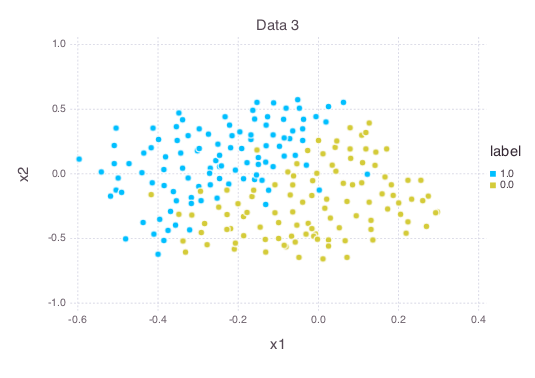

In [14]:
plot(data3_df, x=:x1, y=:x2, color=:label,
     Scale.color_discrete(), Guide.title("Data 3"))

In [37]:
c_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
best_score = best_c = best_s = -Inf

for c in c_values
    for s in sigma_values
        model = SVC(kernel="rbf", C=c, gamma=1/(2 * (s^2)))
        model = ScikitLearn.fit!(model, data_2["X"], data_2["y"][:,1])
        val_score = score(model, data_3["Xval"], data_3["yval"][:,1])
        if val_score > best_score
            best_score, best_c, best_s = val_score, c, s
        end
        println("Use c = $(c), s = $(s), get accuracy $(val_score)")
    end
end

Use c = 0.01, s = 0.01, get accuracy 0.435
Use c = 0.01, s = 0.03, get accuracy 0.435
Use c = 0.01, s = 0.1, get accuracy 0.435
Use c = 0.01, s = 0.3, get accuracy 0.435
Use c = 0.01, s = 1.0, get accuracy 0.435
Use c = 0.01, s = 3.0, get accuracy 0.435
Use c = 0.01, s = 10.0, get accuracy 0.435
Use c = 0.01, s = 30.0, get accuracy 0.435
Use c = 0.03, s = 0.01, get accuracy 0.435
Use c = 0.03, s = 0.03, get accuracy 0.435
Use c = 0.03, s = 0.1, get accuracy 0.435
Use c = 0.03, s = 0.3, get accuracy 0.435
Use c = 0.03, s = 1.0, get accuracy 0.435
Use c = 0.03, s = 3.0, get accuracy 0.435
Use c = 0.03, s = 10.0, get accuracy 0.435
Use c = 0.03, s = 30.0, get accuracy 0.435
Use c = 0.1, s = 0.01, get accuracy 0.435
Use c = 0.1, s = 0.03, get accuracy 0.435
Use c = 0.1, s = 0.1, get accuracy 0.435
Use c = 0.1, s = 0.3, get accuracy 0.435
Use c = 0.1, s = 1.0, get accuracy 0.435
Use c = 0.1, s = 3.0, get accuracy 0.435
Use c = 0.1, s = 10.0, get accuracy 0.435
Use c = 0.1, s = 30.0, get acc

In [16]:
println(best_c)
println(best_s)

3.0
3.0


Then we found the best combinations from the 64 trials. There are 3 groups getting relatively higher accuracy (>0.7) on the validation set. We can plot them to see the decision boundaries.

In [34]:
function plot_decision(dataframe, data_dict, c, sigma; title=nothing)
    model = SVC(kernel="rbf", C=c, gamma=1/(2 * sigma^2))
    model = ScikitLearn.fit!(model, data_dict["X"], data_dict["y"][:,1])

    x_min, x_max = minimum(data_dict["X"][:, 1]) - .5, maximum(data_dict["X"][:, 1]) + .5
    y_min, y_max = minimum(data_dict["X"][:, 2]) - .5, maximum(data_dict["X"][:, 2]) + .5
    xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)

    z = decision_function(model, hcat(xx[:], yy[:]))
    z = reshape(z, size(xx)...)

    p1 = plot(layer(dataframe, x=:x1, y=:x2, Geom.point, color=:label),
              layer(z=z', x=x_min:h:x_max, y=y_min:h:y_max, Geom.contour(levels = [0.0])),
              Scale.color_discrete(), 
              Guide.title(title == nothing ? "Decision Boundary with C = $(c), s = $(sigma)" : title))
    return p1
end

plot_decision (generic function with 2 methods)

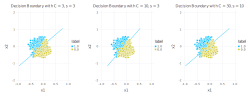

In [45]:
p1 = plot_decision(data3_df, data_3, 3, 3)
p2 = plot_decision(data3_df, data_3, 10, 3)
p3 = plot_decision(data3_df, data_3, 30, 10)
draw(SVG(25cm, 10cm), hstack(p1, p2, p3))

# 2. Spam Classification
## 2.1 Preprocessing Emails
### 2.1.1 Vocabulary List
In this section, we will use SVM to train a spam email classifier. They have already pre-processed the texts. For future projects, `TextAnalysis.jl` looks like a promising julia tool.

In [51]:
spam_train = matread("./data/spamTrain.mat")
spam_test = matread("./data/spamTest.mat")
size(spam_train["X"])

(4000,1899)

Dict{String,Any} with 2 entries:
  "Xtest" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 …
  "ytest" => [1.0; 0.0; … ; 1.0; 0.0]